In [74]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
#reading the csv file as a dataframe
df = pd.read_csv('/content/TSLA.csv')

In [76]:
#viewing the top 5 entries of the dataset (You can pass in the number of entries you wish to see as an argument)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


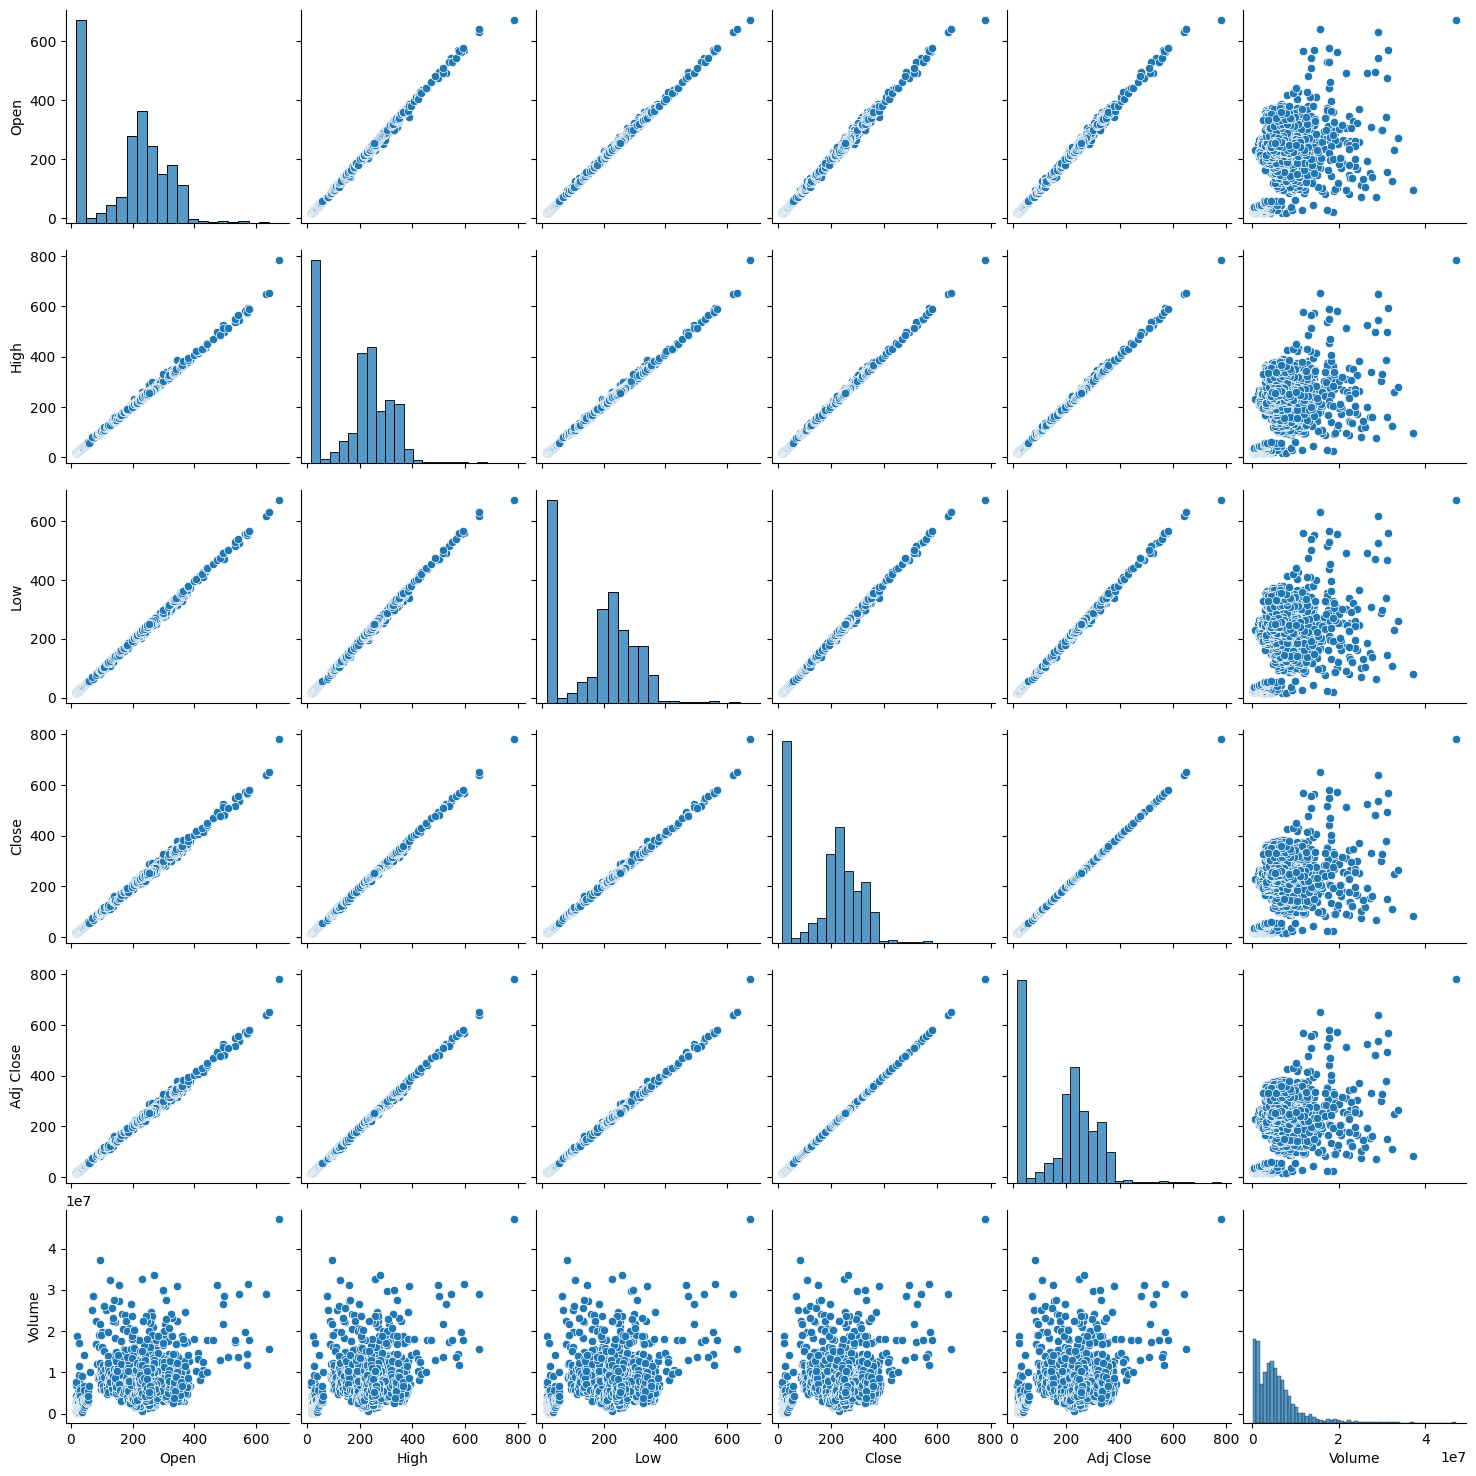

In [77]:
#data analysis, to understand the relation between each feature
sns.pairplot(data=df)

In [78]:
#to get some information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [79]:
#describe method gives the information of various aspects of each feature in the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Here, considering the 'Open' feature, 25% of values are less than or equal to 34.342498. Similarly, 50% of values are less than or equal to 213.035004 and 75% of values are less than or equal to 266.450012 (this includes the values under 25% and 75% as well)

**Some data preprocessing**

In [80]:
df = df.drop(['Date'],axis=1)
df=df.drop(['Adj Close'],axis=1)

In [81]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [82]:
df.head(3)

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800


In [83]:
df.tail(3)

,Open,High,Low,Close,Volume
2413,632.419983,650.880005,618.00000,640.809998,29005700
2414,640.000000,653.000000,632.52002,650.570007,15719300
2415,673.690002,786.140015,673.52002,780.000000,47065000


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
X=df[['Open', 'High', 'Low','Volume']]
y=df['Close']

In [86]:
X

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
2411,568.489990,576.809998,558.080017,11788500
2412,575.690002,589.799988,567.429993,17801500
2413,632.419983,650.880005,618.000000,29005700
2414,640.000000,653.000000,632.520020,15719300


In [87]:
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

With X and y ready, its time to split them into train and test (validation) sets

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-4.216220810485331


#Ridge Regression

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [90]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [91]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-4.216220810477891


1. No overfitting in Linear Regression

2. Small data

3. Highly correlated features

#Lasso Regression

In [92]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [93]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.360e+03, tolerance: 1.888e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+04, tolerance: 2.726e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+04, tolerance: 3.295e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [94]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-12.863801462294386


In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [96]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

<ipython-input-97-94bf15204519>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='Close', ylabel='Density'>

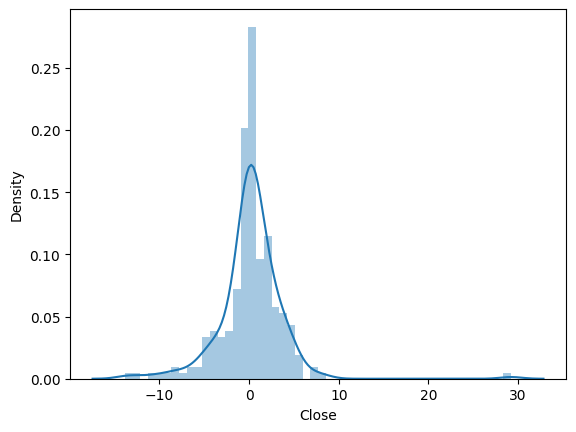

In [97]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

<ipython-input-98-d860d667fff4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: xlabel='Close', ylabel='Density'>

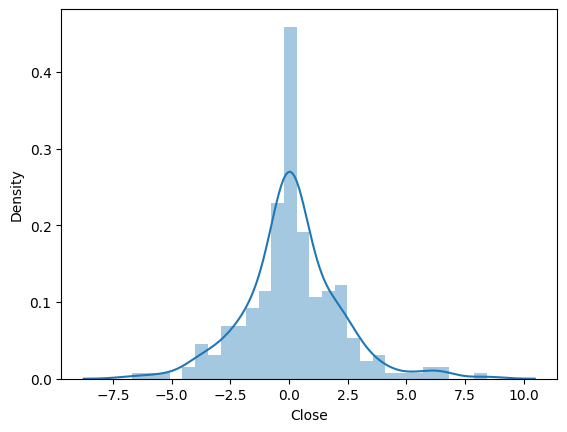

In [98]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)